CD LEO 3YP - Python Intro MTWK3 Homework

In [3]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib as plt
import csv

In [4]:
#Import csv file; column '0' is the date and time of the energy reading
PV_url = "https://github.com/mrt7117/LEOtransport/blob/b25e63b5be2f9cbb7e1ccd57dc2efbe9cf34ac4d/example_PV_data.csv"
df = pd.read_csv("example_PV_data.csv", index_col=0,parse_dates=True,dayfirst=True, delimiter=",")
df.head() # Displays head of long csv file

,Energy (kWh)
Datetime,
2019-01-01 00:30:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 01:30:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 02:30:00,0.0


Text(0, 0.5, 'Daily energy output (kWh)')

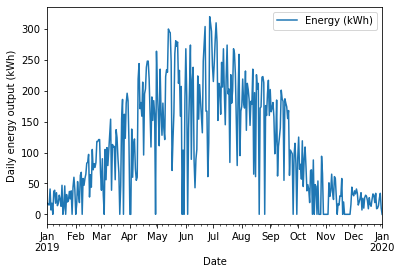

In [5]:
#daily energy over the period of a year
# resample data, taking sum of each day
daily_df = df.resample('D').sum()
daily_df.plot()
plt.pyplot.xlabel("Date")
plt.pyplot.ylabel("Daily energy output (kWh)")

Text(0, 0.5, 'Max half-hourly energy output (kWh)')

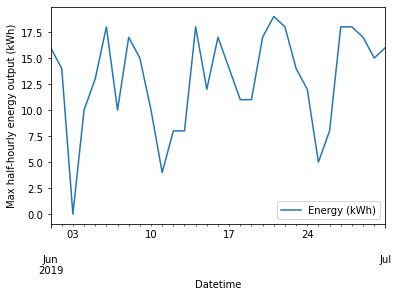

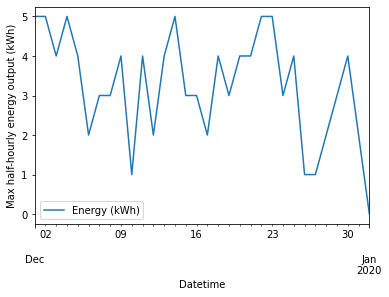

In [6]:
#daily maximum half-hourly power over June and December
# find all data from June and December
Jun_df = df.loc['2019-06-01':'2019-07-01']
Dec_df = df.loc['2019-12-01':'2020-01-01']

# resample data, extracting max from each day
Jun_daily_max = Jun_df.resample('D').max()
Dec_daily_max = Dec_df.resample('D').max()

Jun_daily_max.plot()
plt.pyplot.ylabel("Max half-hourly energy output (kWh)")
Dec_daily_max.plot()
plt.pyplot.ylabel("Max half-hourly energy output (kWh)")

Text(0.5, 0, 'Day')

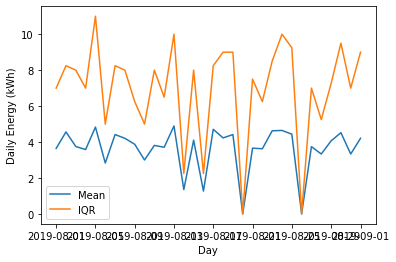

In [7]:
#average half-hourly profile for an August day with interquartile range
Aug_df = df.loc['2019-08-01':'2019-09-01']

Aug_mean = Aug_df.resample('D').mean()

Aug_Q1 = Aug_df.resample('D').quantile(0.25)

Aug_Q3 = Aug_df.resample('D').quantile(0.75)

Aug_IQR = Aug_Q3-Aug_Q1
plt.pyplot.plot(Aug_mean, label='Mean')
#plt.pyplot.plot(Aug_Q1, label='Q1')
#plt.pyplot.plot(Aug_Q3, label='Q3')
plt.pyplot.plot(Aug_IQR, label='IQR')

plt.pyplot.legend()

plt.pyplot.ylabel("Daily Energy (kWh)")
plt.pyplot.xlabel("Day")


In [8]:
#Don't forget a legend, axis labels, units and any conversions.

In [9]:
#What is the total solar energy generated over the year?
Year2019_2020 = df.resample('Y').sum()
Year2019 = Year2019_2020.at['2019-12-31','Energy (kWh)']

print("Total solar energy generated over the year:",Year2019,"kWh")

Total solar energy generated over the year: 40051.0 kWh


Is there any missing data? How might you deal with this?
- The days of 0 or extremely low energy in August imply that there is missing data; even with cloud cover, we'd expect to see some power output in summer. 
- Missing data can be removed from the graphs, or (if there is enough confidence of the model) can be interpolated *but only for general trends - it would be misleading to interpolate data at a high resolution*

In [12]:
#Estimate the capacity of the installation if it is in Oxford (hint: what is the capacity factor for PV in the UK).

# energy output = capacity factor * capacity * hours/day * days/year (assuming kWh)

# Assume capacity factor of this data is roughly same as capacity factor across the uk
cf = 0.1 #capacity factor in UK
T = 365*24 #hours in a year

capacity = Year2019/(cf*T)

print("Estimated Capacity of PV Plant",capacity,'kW')

Estimated Capacity of PV Plant 45.720319634703195 kW
